In [1]:
# import Ipynb_importer
# from RBT_Enc import*
from cluster import*
from IBT_Enc import*
from manifold_utils import*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import copy
import pandas as pd

from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_covtype

from sklearn.preprocessing import scale
# import pylab as pl
# import sys
from sklearn.model_selection import train_test_split  # 训练测试数据分割
from sklearn.preprocessing import StandardScaler  # 标准化工具
# from sklearn.svm import LinearSVC
# from sklearn.metrics import classification_report  # 预测结果分析工具
from sklearn.metrics import accuracy_score as acc

# from sklearn.metrics import pairwise_distances  # 计算两个2维数组对应元素之间距离,1行表示1个元素
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import trustworthiness
from sklearn import decomposition 

from sklearn.metrics.pairwise import euclidean_distances 

In [3]:

from numpy import savetxt
from numpy import loadtxt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder  #将文本标签转化为数字

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


#### 流形学习比PCA的优越性
* 瑞士卷
* 或手写数字集MNIST
* 或人脸数据

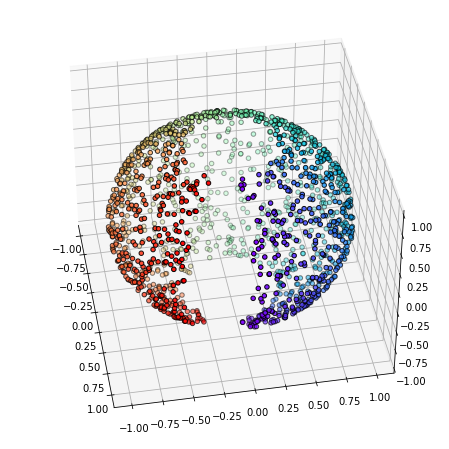

In [14]:
# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

from matplotlib.ticker import NullFormatter
from sklearn import manifold
from sklearn.utils import check_random_state

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import warnings

# Variables for manifold learning.
n_neighbors = 10
n_samples = 2000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
# plt.suptitle(
#     "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
# )
ax = fig.add_subplot( projection="3d")
ax.scatter(x, y, z, c=p[indices],edgecolors='black', cmap=plt.cm.rainbow)  # cmap=plt.cm.Spectral,
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

In [5]:
## PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)      #降为特征2维
trans_data = pca.fit(sphere_data).transform(sphere_data).T

fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot()
plt.scatter(trans_data[0], trans_data[1], c=colors, edgecolors='black',cmap=plt.cm.rainbow)

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

NameError: name 'sphere_data' is not defined

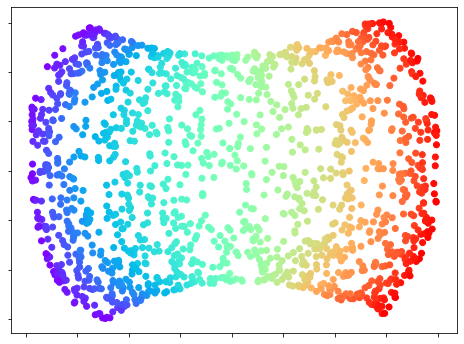

In [280]:
# Perform Isomap Manifold learning.
fig = plt.figure(figsize=(8, 6))
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data).T)

ax = fig.add_subplot()
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
# plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()

In [ ]:
## 瑞士卷数据集
# from sklearn.datasets import make_swiss_roll
# X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)#疑问t是啥？
# #确定坐标轴坐标
# axes = [-11.5, 14, -2, 23, -12, 15]
# #画3d图
# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot(111, projection='3d')

# #X[:, 0], X[:, 1], X[:, 2]数组，c=t,标记色卡,
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t)
# #仰角转化
# ax.view_init(10, -70)
# #标记坐标轴
# ax.set_xlabel("$x_1$", fontsize=18)
# ax.set_ylabel("$x_2$", fontsize=18)
# ax.set_zlabel("$x_3$", fontsize=18)
# plt.show()


# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot()

# X11,X12 = Dim_reduce('pca', X, X, 2)

# #X[:, 0], X[:, 1], X[:, 2]数组，c=t,标记色卡,
# ax.scatter(X11[:, 0], X11[:, 1], c=t)
# #仰角转化
# # ax.view_init(10, -70)
# #标记坐标轴
# ax.set_xlabel("$x_1$", fontsize=18)
# ax.set_ylabel("$x_2$", fontsize=18)

# plt.show()

# fig = plt.figure(figsize=(10,8))
# ax = fig.add_subplot()

# X21,X22 = Dim_reduce('isomap', X, X, 2)

# #X[:, 0], X[:, 1], X[:, 2]数组，c=t,标记色卡,
# ax.scatter(X21[:, 0], X21[:, 1], c=t)
# #仰角转化
# # ax.view_init(10, -70)
# #标记坐标轴
# ax.set_xlabel("$x_1$", fontsize=18)
# ax.set_ylabel("$x_2$", fontsize=18)

# plt.show()

### 通过聚类和可信度评价隐私保护降维

* covtype数据集：(581012, 54) 7类

In [3]:

# def forest_dataload():
#     forest = fetch_covtype()
#     Data= forest['data']
#     label = forest['target']
#     return Data, label 

# d,l = forest_dataload()

(2600, 1)

In [6]:
# localization数据预处理
def localization_data():
    path = "./ConfLongDemo_JSI.txt"
    df = pd.read_table(path, sep=',', names=['SequenceName', 'TagIdentificator',
                                         'Timestamp', 'date', 'x', 'y', 'z', 'activity'])
#     df = pd.read_table(path, sep=',')
    
    # 对类别型特征进行哑变量的制作
    cat_features = ['SequenceName', 'TagIdentificator']
    for col in cat_features:
        df[col] = df[col].astype('object')
    X_cat = df[cat_features]
    X_cat = pd.get_dummies(X_cat)
#     print(X_cat.head())

    # 对数值型特征进行数据标准化和归一化
    scale_X = preprocessing.StandardScaler()
    num_features = ['Timestamp', 'x', 'y', 'z']
    X_num = scale_X.fit_transform(df[num_features])
    X_num = preprocessing.normalize(X_num, norm='l2')
    X_num = pd.DataFrame(data=X_num, columns=num_features, index=df.index)
#     print(X_num.head())

    # 合并数据
    X = pd.concat([X_cat, X_num], axis=1, ignore_index=False)
    y = df['activity']
    
    X = np.array(X)
    encoder=LabelEncoder()
    y_encoded=encoder.fit_transform(y)    #将字符串标签转为数字标签
#     np.unique(y_encoded)  #多少个类
#     np.bincount(y_encoded)  # 每个类的数量

#     print(X.head())
#     print(X.shape)
#     print(y.shape)

    return X, y_encoded

In [7]:
## 获取数据
def Get_data( data ):
    
    if(data == 'iris'):
        iris = datasets.load_iris()
        X = iris.data
        y = iris.target
    elif(data == 'wine'):
        wine = datasets.load_wine()
        X = wine.data
        y = wine.target
    elif(data=='digits'):
        digits = load_digits()
        # 将数据中全0的列删除
        X = copy.deepcopy(digits.data)
        y = digits.target
        zero  = np.zeros(X.shape[1])
        X = np.insert(X, 0, zero, axis=0) # 将zero插入到D的第1行
        for i in range(X.shape[1]):
            if(sum(X[:,i]!=0)==0):

                X[0][i] = 1   # 若该列全为0 ，则标记为1

        nu_col = np.where(X[0]==1)      #找到所有标记为1的列
        X = np.delete(X, nu_col, axis=1)  # 删除所有标记为1的列
        X = np.delete(X, 0, axis=0)      #删除第一行标记行
        print(X.shape)
        
    elif(data=='covtype'):
        forest = fetch_covtype()
        X= forest['data']
        y = forest['target']
        
    elif(data=='localization'):
        X, y = localization_data()
        
    elif(data=='faces'):
        faces = fetch_lfw_people(min_faces_per_person=30)   #or 60
        X = faces.data
        y = faces.target
        
        
    elif(data=='SouthGermanCredit'):    
        df = pd.read_csv('data/SouthGermanCredit.asc', sep=' ')

        X = np.array(df.iloc[:, 0:20])  # 因为前20列都是特征值
        y = np.array(df.iloc[:, 20])  # 第21列才是标签

    elif(data=='madelon'):           
        train_data = pd.read_csv('data/madelon_train.data', header=None, sep='\s+')
        train_labels = pd.read_csv('data/madelon_train.labels', header=None, sep='\s+')

        test_data = pd.read_csv('data/madelon_valid.data', header=None, sep='\s+')
        test_labels = pd.read_csv('data/madelon_valid.labels', header=None, sep='\s+')
        X_train = np.array(train_data)
        y_train = np.array(train_labels)

        X_test = np.array(test_data)
        y_test = np.array(test_labels)
        X = np.r_[X_train,X_test]
        y = np.r_[y_train,y_test]
        y = np.squeeze(y,axis = 1)
        
    return X, y


 # 数据加密  
def Enc_data( X ):
    X_ibt = IBT(X)
    return X_ibt

In [8]:
# 对数据降维
def Dim_reduce(method, X, X_ibt, dim_num):
    if(method=='pca'):
        pca = PCA(n_components=dim_num)      #降为特征2维
        X_reduce = pca.fit(scale(X)).transform(scale(X))
        X_ibt_reduce = pca.fit_transform(X_ibt)
    elif(method=='fastica'):
        fastica = decomposition.FastICA(n_components=dim_num)
        X_reduce = fastica.fit_transform(scale(X))
        X_ibt_reduce = fastica.fit_transform(X_ibt)
    elif(method=='isomap'):
        iso = manifold.Isomap(n_components=dim_num)  # 图像数据是 n_neighbors=10
        X_reduce = iso.fit_transform(X)
        X_ibt_reduce = iso.fit_transform(X_ibt)
    elif(method=='tsne'):
        tsne = manifold.TSNE(random_state=42)
        X_reduce = tsne.fit_transform(scale(X))
        X_ibt_reduce = tsne.fit_transform(X_ibt)
    elif(method=='mds'):
        mds = manifold.MDS(n_components=dim_num)
        X_reduce = mds.fit_transform(scale(X))
        X_ibt_reduce = mds.fit_transform(X_ibt)
    elif(method=='lle'):
        lle = manifold.LocallyLinearEmbedding(n_components=dim_num)
        X_reduce = lle.fit_transform(scale(X))
        X_ibt_reduce = lle.fit_transform(X_ibt)
        
    return X_reduce, X_ibt_reduce


In [9]:
# 评价降维效果

from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split  # 训练测试数据分割
from sklearn.preprocessing import StandardScaler  # 标准化工具
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def trust_eva(X, y, X_reduce, X_ibt_reduce):
    # 1.可信性评价
#     k = 6     # 近邻数量
#     sample_rate = 0.6   #抽样率
#     trust_D = trustworthiness(X, X_reduce, n_neighbors=k)
#     trust_enc_D = trustworthiness(X, X_ibt_reduce, n_neighbors=k)
    
    trust_D = trustworthiness(X, X_reduce)    # 默认k=5
    trust_enc_D = trustworthiness(X, X_ibt_reduce)

#     # 2.聚类评价
#     classes = len(np.unique(y))     
#     y1 = KMEANS(X_reduce, classes)
#     y2 = KMEANS(X_ibt_reduce, classes)
#     km_D =  ARI(y1, y)
#     km_enc_D = ARI(y2, y)
    
    # 3.分类评价
#     pr,rs,f1s = class_eva(X_reduce, y)
#     enc_pr,enc_rs,enc_f1s = class_eva(X_ibt_reduce, y)
#     temp = np.array([trust_D,trust_enc_D,km_D,km_enc_D,pr,rs,f1s,enc_pr,enc_rs,enc_f1s])

    temp = [trust_D,trust_enc_D]
    return temp

def cluster_eva(X, y, X_reduce, X_ibt_reduce):

    # 2.聚类评价
    classes = len(np.unique(y))     
#     y1 = KMEANS(X_reduce, classes)
#     y2 = KMEANS(X_ibt_reduce, classes)
    
    y1 = KMODES(X_reduce, classes)
    y2 = KMODES(X_ibt_reduce, classes)
    
    km_D =  ARI(y1, y)
    km_enc_D = ARI(y2, y)
    
    temp = [km_D ,km_enc_D]
    return temp


def class_eva(X_reduce, X_ibt_reduce, y):
    
    # 分割数据
    X_train, X_test, Y_train, Y_test = train_test_split(X_reduce, y, test_size=0.25, random_state=33)
    X_enc_train, X_enc_test, Y_enc_train, Y_enc_test = train_test_split(X_ibt_reduce, 
                                                                        y, test_size=0.25, random_state=33)
    ss = StandardScaler()
    # fit是实例方法，必须由实例调用
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
#     或
#     X_train = scale(X_train)
#     X_test = scale(X_test)

    lsvc = SVC()
    y_pre = (lsvc.fit(X_train, Y_train)).predict(X_test)
    y_enc_pre = (lsvc.fit(X_enc_train, Y_enc_train)).predict(X_enc_test)
    
#     pr = precision_score(Y_predict,Y_test,average='macro')
#     rs = recall_score(Y_predict,Y_test,average='macro')
#     f1s = f1_score(Y_predict,Y_test,average='macro')

    acc1 = accuracy_score(y_pre, Y_test)
    acc2 = accuracy_score(y_enc_pre, Y_enc_test)
    temp = [acc1 ,acc2]
    return temp


# def Eva(X, y, X_reduce, X_ibt_reduce):
#     # 1.可信性评价
# #     k = 6     # 近邻数量
# #     sample_rate = 0.6   #抽样率
    
# #     trust_D = trustworthiness(X, X_reduce, n_neighbors=k)
# #     trust_enc_D = trustworthiness(X, X_ibt_reduce, n_neighbors=k)
    
#     trust_D = trustworthiness(X, X_reduce)    # 默认k=5
#     trust_enc_D = trustworthiness(X, X_ibt_reduce)

#     # 2.聚类评价
#     classes = len(np.unique(y))     
#     y1 = KMEANS(X_reduce, classes)
#     y2 = KMEANS(X_ibt_reduce, classes)
#     km_D =  ARI(y1, y)
#     km_enc_D = ARI(y2, y)
    
#     # 3.分类评价
#     pr,rs,f1s = class_eva(X_reduce, y)
#     enc_pr,enc_rs,enc_f1s = class_eva(X_ibt_reduce, y)
    
#     temp = np.array([trust_D,trust_enc_D,km_D,km_enc_D,pr,rs,f1s,enc_pr,enc_rs,enc_f1s])
#     return temp



#     print("原数据降维后聚类", ARI(y1, y))
#     print("加密数据降维后聚类", ARI(y2, y))

    # 可视化
#     clusters = np.unique(y)
#     # 为每个群集的样本创建散点图
#     for cluster in clusters:
#         # 获取此群集的示例的行索引
#         row_ix = np.where(y == cluster)
#         # 创建这些样本的散布
#         plt.scatter(X[row_ix, 0], X[row_ix, 1])
#     # 绘制散点图
#     plt.show()

#     print("不加密降维可信度:",trust_D,'\n'
#            "加密降维可信度:", trust_enc_D) 
#     print("不加密降维连续性:",continuous(k, sample_rate, X, X_r),'\n'
#          "加密降维连续性:", continuous(k, sample_rate, X, X_ibt_pca))

### 将加密后的数据存入csv，每个数据集加密10次

数据集
* Iris          150x4,- 3
* wine          178x13 -3
* digits        1797x64 -10
* localization  164860x33 - 11
* covtype       581012x54 - 7

In [154]:
# X, y = Get_data('iris')
# for i in range(10):
#     X_enc = Enc_data(X)
#     savetxt('data/iris_enc'+str(i)+'.csv' , X_enc , delimiter =',')

In [159]:
# X, y = Get_data('wine')
# for i in range(1):
#     X_enc = Enc_data(X)
#     savetxt('data/wine_enc'+str(i)+'.csv' , X_enc , delimiter =',')

In [156]:
# X, y = Get_data('digits')
# for i in range(10):
#     X_enc = Enc_data(X)
#     savetxt('data/digits_enc'+str(i)+'.csv' , X_enc , delimiter =',')

(1797, 61)


In [163]:
# X, y = Get_data('localization')
# for i in range(10):
#     X_enc = Enc_data(X)
#     savetxt('data/localization_enc'+str(i)+'.csv' , X_enc , delimiter =',')

In [ ]:
# X, y = Get_data('covtype')
# for i in range(10):
#     X_enc = Enc_data(X)
#     savetxt('data/covtype_enc'+str(i)+'.csv' , X_enc , delimiter =',')

In [53]:
X, y = Get_data('madelon')
for i in range(10):
    X_enc = Enc_data(X)
    savetxt('data/madelon_enc'+str(i)+'.csv' , X_enc , delimiter =',')

In [ ]:
X, y = Get_data('faces')
for i in range(10):
    X_enc = Enc_data(X)
    savetxt('data/faces_enc'+str(i)+'.csv' , X_enc , delimiter =',')

array([[-0.32399195,  0.45614738, -0.21577906, ...,  0.16974126,
         0.9092871 ,  0.18001273],
       [ 0.27607723,  0.82039247,  0.69025486, ..., -0.84146796,
         0.37940146, -0.94657831],
       [-1.72561643, -1.19544527,  1.3313613 , ..., -0.49631397,
         0.34973225, -0.15623434],
       ...,
       [-0.46339287,  0.23226085, -0.15348196, ...,  0.15984681,
         1.01986895, -0.65854106],
       [ 0.89137692,  0.01009221, -0.48260064, ..., -0.12690724,
        -2.55340913, -1.20806726],
       [ 0.4976988 ,  0.87657884,  0.0641131 , ..., -0.58711255,
        -0.1186594 , -1.55126494]])

### 评估
* 1.可信度
* 2.聚类任务
* 3.分类任务 SVM  GBDT(Gradient Boosting Decision Tree) Classifier 

In [19]:
data_name = 'wine'
X, y = Get_data(data_name )
# X_std = scale(X)
data_trust_val = []   
data_cluster_val = []
data_class_val = []

method = 'isomap'
dim_list = [4,    3,   2,  2,  2, 2, 2]

for i in range(5):
    X_enc = loadtxt('data/wine_enc'+str(i)+'.csv', delimiter =',')
    
    # 求每次所有维度原数据与加密数据的可信度值
    trust_val = []
    cluster_val = []
    class_val = []
    for dim in dim_list:
        X_reduce, X_ibt_reduce = Dim_reduce(method, X, X_enc, dim)

        trust_val.append(trust_eva(X, y, X_reduce, X_ibt_reduce))
        cluster_val.append(cluster_eva(X, y, X_reduce, X_ibt_reduce))
        class_val.append(class_eva(X_reduce, X_ibt_reduce, y))
        
    trust_val = np.array(trust_val).T
    cluster_val = np.array(cluster_val).T
    class_val = np.array(class_val).T

    # 将10次的都存起来
    data_trust_val.append(trust_val)
    data_cluster_val.append(cluster_val)
    data_class_val.append(class_val)
    
data_trust_val = np.array(data_trust_val)
data_trust_val = np.round(np.mean(data_trust_val,axis = 0), 4)  # 求平均

data_cluster_val = np.array(data_cluster_val)
data_cluster_val = np.round(np.mean(data_cluster_val,axis = 0), 4)  # 求平均

data_class_val = np.array(data_class_val)
data_class_val = np.round(np.mean(data_class_val,axis = 0), 4)  # 求平均

savetxt('eva/'+data_name+'_trust_val.csv', data_trust_val, delimiter =',')
savetxt('eva/'+data_name+'_cluster_val.csv', data_cluster_val, delimiter =',')
savetxt('eva/'+data_name+'_class_val.csv', data_class_val, delimiter =',')

C:\Users\Ricemoon\anaconda3\envs\ppdm\lib\site-packages\sklearn\manifold\_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Ricemoon\anaconda3\envs\ppdm\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Ricemoon\anaconda3\envs\ppdm\lib\site-packages\sklearn\manifold\_isomap.py:322: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Ricemoon\anaconda3\envs\ppdm\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is ex

In [ ]:
data_name = 'digits'
X, y = Get_data(data_name )
# X_std = scale(X)
data_trust_val = []   
data_cluster_val = []
data_class_val = []

method = 'isomap'
dim_list = [32,16,8,4,2]

for i in range(10):
    X_enc = loadtxt('data/digits_enc'+str(i)+'.csv', delimiter =',')
    
    # 求每次所有维度原数据与加密数据的可信度值
    trust_val = []
    cluster_val = []
    class_val = []
    for dim in dim_list:
        X_reduce, X_ibt_reduce = Dim_reduce(method, X, X_enc, dim)

        trust_val.append(trust_eva(X, y, X_reduce, X_ibt_reduce))
        cluster_val.append(cluster_eva(X, y, X_reduce, X_ibt_reduce))
        class_val.append(class_eva(X_reduce, X_ibt_reduce, y))
        
    trust_val = np.array(trust_val).T
    cluster_val = np.array(cluster_val).T
    class_val = np.array(class_val).T

    # 将10次的都存起来
    data_trust_val.append(trust_val)
    data_cluster_val.append(cluster_val)
    data_class_val.append(class_val)
    
data_trust_val = np.array(data_trust_val)
data_trust_val = np.round(np.mean(data_trust_val,axis = 0), 4)  # 求平均

data_cluster_val = np.array(data_cluster_val)
data_cluster_val = np.round(np.mean(data_cluster_val,axis = 0), 4)  # 求平均

data_class_val = np.array(data_class_val)
data_class_val = np.round(np.mean(data_class_val,axis = 0), 4)  # 求平均

savetxt('eva/'+data_name+'_trust_val.csv', data_trust_val, delimiter =',')
savetxt('eva/'+data_name+'_cluster_val.csv', data_cluster_val, delimiter =',')
savetxt('eva/'+data_name+'_class_val.csv', data_class_val, delimiter =',')

In [ ]:
data_name = 'localization' 
X, y = Get_data(data_name )
# X_std = scale(X)
data_trust_val = []   
data_cluster_val = []
data_class_val = []

method = 'isomap'
dim_list = [16,8,6,3,2]

for i in range(10):
    X_enc = loadtxt('data/localization_enc'+str(i)+'.csv', delimiter =',')
    
    # 求每次所有维度原数据与加密数据的可信度值
    trust_val = []
    cluster_val = []
    class_val = []
    for dim in dim_list:
        X_reduce, X_ibt_reduce = Dim_reduce(method, X, X_enc, dim)

        trust_val.append(trust_eva(X, y, X_reduce, X_ibt_reduce))
        cluster_val.append(cluster_eva(X, y, X_reduce, X_ibt_reduce))
        class_val.append(class_eva(X_reduce, X_ibt_reduce, y))
        
    trust_val = np.array(trust_val).T
    cluster_val = np.array(cluster_val).T
    class_val = np.array(class_val).T

    # 将10次的都存起来
    data_trust_val.append(trust_val)
    data_cluster_val.append(cluster_val)
    data_class_val.append(class_val)
    
data_trust_val = np.array(data_trust_val)
data_trust_val = np.round(np.mean(data_trust_val,axis = 0), 4)  # 求平均

data_cluster_val = np.array(data_cluster_val)
data_cluster_val = np.round(np.mean(data_cluster_val,axis = 0), 4)  # 求平均

data_class_val = np.array(data_class_val)
data_class_val = np.round(np.mean(data_class_val,axis = 0), 4)  # 求平均

savetxt('eva/'+data_name+'_trust_val.csv', data_trust_val, delimiter =',')
savetxt('eva/'+data_name+'_cluster_val.csv', data_cluster_val, delimiter =',')
savetxt('eva/'+data_name+'_class_val.csv', data_class_val, delimiter =',')

In [ ]:
# data_name = 'covtype' 
# X, y = Get_data(data_name )
# # X_std = scale(X)
# data_trust_val = []   
# data_cluster_val = []
# data_class_val = []

# method = 'isomap'
# dim_list = [27,13,7,4,2]

# for i in range(10):
#     X_enc = loadtxt('data/covtype_enc'+str(i)+'.csv', delimiter =',')
    
#     # 求每次所有维度原数据与加密数据的可信度值
#     trust_val = []
#     cluster_val = []
#     class_val = []
#     for dim in dim_list:
#         X_reduce, X_ibt_reduce = Dim_reduce(method, X, X_enc, dim)

#         trust_val.append(trust_eva(X, y, X_reduce, X_ibt_reduce))
#         cluster_val.append(cluster_eva(X, y, X_reduce, X_ibt_reduce))
#         class_val.append(class_eva(X_reduce, X_ibt_reduce, y))
        
#     trust_val = np.array(trust_val).T
#     cluster_val = np.array(cluster_val).T
#     class_val = np.array(class_val).T

#     # 将10次的都存起来
#     data_trust_val.append(trust_val)
#     data_cluster_val.append(cluster_val)
#     data_class_val.append(class_val)
    
# data_trust_val = np.array(data_trust_val)
# data_trust_val = np.round(np.mean(data_trust_val,axis = 0), 4)  # 求平均

# data_cluster_val = np.array(data_cluster_val)
# data_cluster_val = np.round(np.mean(data_cluster_val,axis = 0), 4)  # 求平均

# data_class_val = np.array(data_class_val)
# data_class_val = np.round(np.mean(data_class_val,axis = 0), 4)  # 求平均

# savetxt('eva/'+data_name+'_trust_val.csv', data_trust_val, delimiter =',')
# savetxt('eva/'+data_name+'_cluster_val.csv', data_cluster_val, delimiter =',')
# savetxt('eva/'+data_name+'_class_val.csv', data_class_val, delimiter =',')

In [ ]:
data_name = 'faces' 
X, y = Get_data(data_name )
# X_std = scale(X)
data_trust_val = []   
data_cluster_val = []
data_class_val = []

method = 'isomap'
dim_list = [1000,150,50,10,2]

for i in range(10):
    X_enc = loadtxt('data/faces_enc'+str(i)+'.csv', delimiter =',')
    
    # 求每次所有维度原数据与加密数据的可信度值
    trust_val = []
    cluster_val = []
    class_val = []
    for dim in dim_list:
        X_reduce, X_ibt_reduce = Dim_reduce(method, X, X_enc, dim)

        trust_val.append(trust_eva(X, y, X_reduce, X_ibt_reduce))
        cluster_val.append(cluster_eva(X, y, X_reduce, X_ibt_reduce))
        class_val.append(class_eva(X_reduce, X_ibt_reduce, y))
        
    trust_val = np.array(trust_val).T
    cluster_val = np.array(cluster_val).T
    class_val = np.array(class_val).T

    # 将10次的都存起来
    data_trust_val.append(trust_val)
    data_cluster_val.append(cluster_val)
    data_class_val.append(class_val)
    
data_trust_val = np.array(data_trust_val)
data_trust_val = np.round(np.mean(data_trust_val,axis = 0), 4)  # 求平均

data_cluster_val = np.array(data_cluster_val)
data_cluster_val = np.round(np.mean(data_cluster_val,axis = 0), 4)  # 求平均

data_class_val = np.array(data_class_val)
data_class_val = np.round(np.mean(data_class_val,axis = 0), 4)  # 求平均

savetxt('eva/'+data_name+'_trust_val.csv', data_trust_val, delimiter =',')
savetxt('eva/'+data_name+'_cluster_val.csv', data_cluster_val, delimiter =',')
savetxt('eva/'+data_name+'_class_val.csv', data_class_val, delimiter =',')

In [69]:
data_name = 'madelon' 
X, y = Get_data(data_name )
# X_std = scale(X)
data_trust_val = []   
data_cluster_val = []
data_class_val = []

method = 'isomap'
dim_list = [200,100,50,10,2]

for i in range(5):
    X_enc = loadtxt('data/madelon_enc'+str(i)+'.csv', delimiter =',')
    
    # 求每次所有维度原数据与加密数据的可信度值
    trust_val = []
    cluster_val = []
    class_val = []
    for dim in dim_list:
        X_reduce, X_ibt_reduce = Dim_reduce(method, X, X_enc, dim)

        trust_val.append(trust_eva(X, y, X_reduce, X_ibt_reduce))
        cluster_val.append(cluster_eva(X, y, X_reduce, X_ibt_reduce))
        class_val.append(class_eva(X_reduce, X_ibt_reduce, y))
        
    trust_val = np.array(trust_val).T
    cluster_val = np.array(cluster_val).T
    class_val = np.array(class_val).T

    # 将10次的都存起来
    data_trust_val.append(trust_val)
    data_cluster_val.append(cluster_val)
    data_class_val.append(class_val)
    
data_trust_val = np.array(data_trust_val)
data_trust_val = np.round(np.mean(data_trust_val,axis = 0), 4)  # 求平均

data_cluster_val = np.array(data_cluster_val)
data_cluster_val = np.round(np.mean(data_cluster_val,axis = 0), 4)  # 求平均

data_class_val = np.array(data_class_val)
data_class_val = np.round(np.mean(data_class_val,axis = 0), 4)  # 求平均

savetxt('eva/'+data_name+'_trust_val.csv', data_trust_val, delimiter =',')
savetxt('eva/'+data_name+'_cluster_val.csv', data_cluster_val, delimiter =',')
savetxt('eva/'+data_name+'_class_val.csv', data_class_val, delimiter =',')

### 可视化
* 可信度

In [10]:
# t1 = loadtxt('isoeva/iris_trust_val.csv', delimiter =',')
t2 = loadtxt('isoeva/wine_trust_val.csv', delimiter =',')[:,::-1]
t3 = loadtxt('isoeva/digits_trust_val.csv', delimiter =',')[:,::-1]
t4 = loadtxt('isoeva/SouthGermanCredit_trust_val.csv', delimiter =',')[:,::-1]
t5 = loadtxt('isoeva/madelon_trust_val.csv', delimiter =',')[:,::-1]
t6 = loadtxt('isoeva/faces_trust_val.csv', delimiter =',')[:,::-1]

In [35]:
t3

array([[0.8419, 0.9692, 0.9923, 0.9948, 0.9955],
       [0.8873, 0.9772, 0.9903, 0.994 , 0.995 ]])

In [34]:
t3[:,1:]

array([[0.9692, 0.9923, 0.9948, 0.9955],
       [0.9772, 0.9903, 0.994 , 0.995 ]])

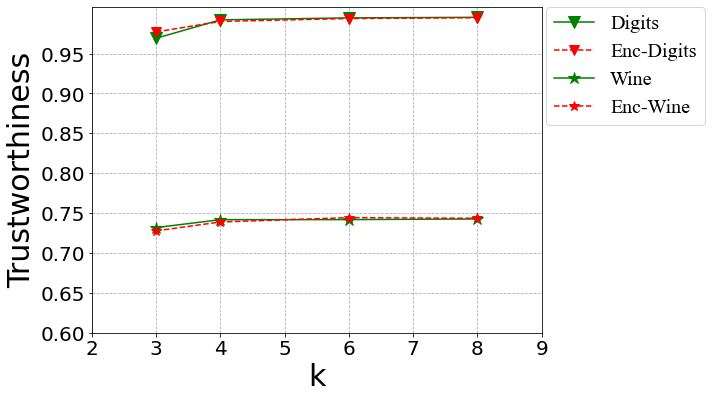

In [100]:
# 可视化   每种方法画一次
# 值顺序要颠倒
k_list = [3,4,6,8]
# 画图
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot()
marker_list = ['v','x','*']

ax.plot( k_list, t3[:,1:][0] ,label= 'Digits', linewidth =1.5,color='g',marker = marker_list[0],markersize=12)
ax.plot( k_list, t3[:,1:][1] ,'--',label= 'Enc-Digits', linewidth =1.5,color='r',marker = marker_list[0],markersize=10)

ax.plot( k_list, t2[:,1:][0] ,label= 'Wine', linewidth =1.5,color='g',marker = marker_list[2],markersize=12)
ax.plot( k_list, t2[:,1:][1] ,'--',label= 'Enc-Wine', linewidth =1.5,color='r',marker = marker_list[2],markersize=10)

plt.xlabel('k',fontsize=30)
plt.ylabel('Trustworthiness',fontsize=30) 


plt.xticks(np.arange(2,10) , size = 20)   
plt.yticks(np.arange(0.6, 1,0.05),  size = 20)

plt.legend(bbox_to_anchor=(1.01,1), borderaxespad=0
          ,prop={'family':'Times New Roman', 'size' : 20})
plt.grid(ls= '--')

fig.subplots_adjust(right=0.75)
plt.show()

fig.savefig('neighbors.png',format = 'png',dpi = 600)   # 存在当前路径


In [60]:
#
# savetxt('change_enc.csv' , gap , delimiter =',')

#从文件中加载数据
# gap = loadtxt('change_enc.csv', delimiter =',')

# fig.savefig('change.eps',format = 'eps',dpi = 800)   # 存在当前路径

In [25]:
# from sklearn.datasets import fetch_kddcup99